# (1) Preparation

## 1-1 **Connecting Google Colab to Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:
%cd '/content/drive'
%pwd

/content/drive


'/content/drive'

In [4]:
%ls

MyDrive/


In [5]:
%cd 'MyDrive/'

/content/drive/MyDrive


In [6]:
%pwd

'/content/drive/MyDrive'

In [7]:
%cd 'Colab_Data'

/content/drive/MyDrive/Colab_Data


In [9]:
%pwd

'/content/drive/MyDrive/Colab_Data'

## 1-2 **Loading Data**

In [10]:
'''
import tensorflow as tf
tf.test.gpu_device_name()
# /device:GPU:0 means success
'''

'\nimport tensorflow as tf\ntf.test.gpu_device_name()\n# /device:GPU:0 means success\n'

In [11]:
%pwd

'/content/drive/MyDrive/Colab_Data'

In [12]:
import os
os.chdir(r'FOMC_04_pickle_data')
os.getcwd()

'/content/drive/MyDrive/Colab_Data/FOMC_04_pickle_data'

In [13]:
os.getcwd()

'/content/drive/MyDrive/Colab_Data/FOMC_04_pickle_data'

In [14]:
!pip3 install pickle5
import pickle5 as pickle

     |████████████████████████████████| 132 kB 30.4 MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219317 sha256=ec8b422b65f5c0fd9e63c8d743faca3af900ad1a36e74e3abd6ec262364c8bba
  Stored in directory: /root/.cache/pip/wheels/7e/6a/00/67136a90d6aca437d806d1d3cedf98106e840c97a3e5188198
Successfully built pickle5


In [15]:
# import pickle

FOMC_pickle = [0] * 222 # list(range(0,222))
FOMC_pickle_2 = [0] * 222

for i in range(0,222):
    name = str(i+1)+'.txt'    
    FOMC_pickle[i] = pickle.load(open(name, 'rb'))
    FOMC_pickle_2[i] = ' '.join(FOMC_pickle[i])

In [16]:
FOMC_pickle[0][0:10]

['inform',
 'review',
 'meet',
 'indic',
 'econom',
 'activ',
 'rose',
 'appreci',
 'fourth',
 'quarter']

In [17]:
%cd ..

/content/drive/My Drive/Colab_Data


In [18]:
import pandas as pd
# df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
df = pd.read_excel(r'FOMC_02_excel_data/Fed_fund_rate_change.xlsx')

fund_rate_change = list(df.iloc[:,5])
fund_rate_change_date = list(df.iloc[:,1])

In [19]:
corpus_df = pd.DataFrame({'Document': FOMC_pickle_2, 
                          'Category': fund_rate_change[24:246]})
corpus_df = corpus_df[['Document', 'Category']]
print(corpus_df.head())

                                            Document  Category
0  inform review meet indic econom activ rose app...         0
1  inform review meet suggest econom activ expand...         0
2  inform review meet suggest pace econom expans ...         0
3  inform review meet provid mix read economi bal...         0
4  inform review committe suggest econom activ ex...         0


# (2) Building a Word2Vec Model by Gensim

In [ ]:
'''
# import pickle

FOMC_pickle = [0] * 222 # list(range(0,222))
FOMC_pickle_2 = [0] * 222

for i in range(0,222):
    name = str(i+1)+'.txt'    
    FOMC_pickle[i] = pickle.load(open(name, 'rb'))
    FOMC_pickle_2[i] = ' '.join(FOMC_pickle[i])
'''

"\n# import pickle\n\nFOMC_pickle = [0] * 222 # list(range(0,222))\nFOMC_pickle_2 = [0] * 222\n\nfor i in range(0,222):\n    name = str(i+1)+'.txt'    \n    FOMC_pickle[i] = pickle.load(open(name, 'rb'))\n    FOMC_pickle_2[i] = ' '.join(FOMC_pickle[i])\n"

## 2-1 **All words**

### 2-1-1 *Word2Vec*

In [ ]:
from gensim.models import word2vec
import nltk

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in FOMC_pickle_2]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 10  # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

KeyboardInterrupt: ignored

In [ ]:
from gensim.models import word2vec
import nltk

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in FOMC_pickle_2]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 10  # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

In [ ]:
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=20)] # topn=5
                  for search_term in ['inflat', 'price', 'growth', 'unemploy', 'labor', 'interest', 'money', 'fund', 'exchang']}
similar_words

In [ ]:
similar_words_2 = {
 'exchang': ['equiti', 'chair', 'book', 'substitut', 'impart'],
 'fund': ['reserv', 'assign', 'matur', 'ioer'],
 'growth': ['expans', 'recoveri', 'gain', 'pace', 'expand'],
 'inflat': ['commod', 'disinflationari', 'disinfl', 'anchor'],
 'interest': ['intermedi', 'yield', 'save', 'delinqu', 'homebuild'],
 'labor': ['wage', 'fill', 'inflat', 'age', 'job'],
 'money': ['inflow', 'deposit', 'mutual', 'instrument', 'opportun'],
 'price': ['headlin', 'food', 'core', 'crude'],
 'unemploy': ['forc', 'hire', 'popul', 'workweek', 'reason']}

In [ ]:
'unemploy': ['forc', 'workweek', 'hire', 'save', 'popul', 'jobless', 'age', 'reason', 'work', 'interest', 'underutil', 'delinqu', 'hour', 'quit', 'lengthi']}

In [ ]:
'unemploy': ['forc', 'workweek', 'hire', 'age', 'popul', 'reason', 'jobless', 'save', 'underutil', 'interest', 'hour', 'sideway', 'summari', 'quit', 'group', 'delinqu', 'addendum', 'converg', 'work', 'fill']}

### 2-1-2 *Visualizing word embeddings*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words_2.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(22, 15))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', fontsize=13.5)

In [ ]:
# words for the figure above
'''
similar_words_2 = {
 'exchang': ['equiti', 'chair', 'book', 'substitut', 'impart'],
 'fund': ['reserv', 'assign', 'matur', 'ioer', 'interest'],
 'growth': ['expans', 'recoveri', 'gain', 'pace', 'expand'],
 'inflat': ['commod', 'disinflationari', 'core', 'disinfl', 'anchor'],
 'interest': ['intermedi', 'yield', 'save', 'delinqu', 'homebuild'],
 'labor': ['wage', 'fill', 'inflat', 'age', 'job'],
 'money': ['inflow', 'deposit', 'mutual', 'instrument', 'opportun'],
 'price': ['headlin', 'food', 'core', 'crude', 'inflat'],
 'unemploy': ['forc', 'hire', 'popul', 'workweek', 'reason']}
'''

In [ ]:
w2v_model.most_similar("fed")

In [ ]:
# 1
w2v_model.wv.most_similar("fed")

In [ ]:
# 2
w2v_model.wv.most_similar("growth")

In [ ]:
# 3
w2v_model.wv.most_similar("inflat")

In [ ]:
# 4
w2v_model.wv.most_similar("interest")

In [ ]:
# 5
w2v_model.wv.most_similar("labor")

In [ ]:
# 6
w2v_model.wv.most_similar("money")

In [ ]:
# 7
w2v_model.wv.most_similar("price")

In [ ]:
# 8
w2v_model.wv.most_similar("unemploy")

## 2-2 **Generating the indexes of up, down & unchanged**

In [20]:
# import pickle
!pip3 install pickle5
import pickle5 as pickle

In [21]:
import os
import numpy as np
os.getcwd()

'/content/drive/My Drive/Colab_Data'

In [22]:
import os
os.chdir(r'FOMC_04_pickle_data')
os.getcwd()

'/content/drive/My Drive/Colab_Data/FOMC_04_pickle_data'

In [23]:
FOMC_pickle = [0] * 222 # list(range(0,222))
FOMC_pickle_2 = [0] * 222

for i in range(0,222):
    name = str(i+1)+'.txt'    
    FOMC_pickle[i] = pickle.load(open(name, 'rb'))
    FOMC_pickle_2[i] = ' '.join(FOMC_pickle[i])

In [24]:
%pwd

'/content/drive/My Drive/Colab_Data/FOMC_04_pickle_data'

In [25]:
%cd ..

/content/drive/My Drive/Colab_Data


In [26]:
import pandas as pd
# df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
df = pd.read_excel(r'FOMC_02_excel_data/Fed_fund_rate_change.xlsx')

fund_rate_change = list(df.iloc[:,5])
fund_rate_change_date = list(df.iloc[:,1])

In [27]:
corpus_df = pd.DataFrame({'Document': FOMC_pickle_2, 
                          'Category': fund_rate_change[24:246]})
corpus_df = corpus_df[['Document', 'Category']]
print(corpus_df.head())

                                            Document  Category
0  inform review meet indic econom activ rose app...         0
1  inform review meet suggest econom activ expand...         0
2  inform review meet suggest pace econom expans ...         0
3  inform review meet provid mix read economi bal...         0
4  inform review committe suggest econom activ ex...         0


In [28]:
import numpy as np
print(len(np.array(FOMC_pickle_2))); print(len(np.array(fund_rate_change[24:246])))

222
222


In [29]:
up_index = []
down_index = []
unchanged_index = []

for i in range(24,246):
    if fund_rate_change[i] == 1:
        up_index.append(i-24)
    elif fund_rate_change[i] == -1:
        down_index.append(i-24)
    elif fund_rate_change[i] == 0:
        unchanged_index.append(i-24)
    else:
        print('Wrong !')


In [30]:
print(up_index); print(down_index); print(unchanged_index)

[8, 9, 10, 12, 14, 16, 33, 51, 52, 54, 56, 57, 58, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 183, 191, 193, 195, 199, 201, 203, 205, 207]
[19, 23, 24, 45, 46, 63, 64, 65, 66, 67, 68, 69, 70, 71, 78, 83, 117, 118, 119, 120, 121, 122, 125, 126, 127, 212, 213, 214, 216, 217]
[0, 1, 2, 3, 4, 5, 6, 7, 11, 13, 15, 17, 18, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 53, 55, 59, 60, 61, 62, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 108, 109, 110, 111, 112, 113, 114, 115, 116, 123, 124, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 192, 194, 196, 197, 198, 200, 202, 204, 206, 208, 209, 210, 211, 215, 218, 219, 220, 22

In [31]:
'''
# import pickle

FOMC_pickle = [0] * 222 # list(range(0,222))
FOMC_pickle_2 = [0] * 222

for i in range(0,222):
    name = str(i+1)+'.txt'    
    FOMC_pickle[i] = pickle.load(open(name, 'rb'))
    FOMC_pickle_2[i] = ' '.join(FOMC_pickle[i])
'''

"\n# import pickle\n\nFOMC_pickle = [0] * 222 # list(range(0,222))\nFOMC_pickle_2 = [0] * 222\n\nfor i in range(0,222):\n    name = str(i+1)+'.txt'    \n    FOMC_pickle[i] = pickle.load(open(name, 'rb'))\n    FOMC_pickle_2[i] = ' '.join(FOMC_pickle[i])\n"

In [32]:
print('8'+' 9')

8 9


In [33]:
# Joining with empty separator
list1 = ['g','e','e','k', 's'] 
print("".join(list1))

geeks


In [34]:
print(len(up_index)); print(len(down_index)); print(len(unchanged_index))

39
30
153


In [35]:
FOMC_pickle_up = [0] * len(up_index)

print(FOMC_pickle_up)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [36]:
FOMC_pickle_up = [0] * len(up_index)

print(FOMC_pickle_up)

for i in range(0, len(up_index)):
  k = up_index[i]
  FOMC_pickle_up[i] = FOMC_pickle_2[int(k)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [37]:
FOMC_pickle_down = [0] * len(down_index)

for i in range(0, len(down_index)):
  k = down_index[i]
  FOMC_pickle_down[i] = FOMC_pickle_2[k]

In [38]:
FOMC_pickle_unchanged = [0] * len(unchanged_index)

for i in range(0, len(unchanged_index)):
  k = unchanged_index[i]
  FOMC_pickle_unchanged[i] = FOMC_pickle_2[int(k)]

In [39]:
print(FOMC_pickle_up[0])

inform review meet indic econom activ record strong advanc close month limit data avail product employ suggest appreci gain earli week year hous start strengthen substanti fourth quarter last year busi fix invest regist sharp rise increas broad index consum produc price exclud food energi compon somewhat larger recent month earlier price number commod turn assess januari labor market data complic statist revis weather relat report problem varieti indic point convincingli strengthen demand labor total nonfarm payrol employ post small gain januari sizabl decemb increas manufactur employ rose fourth consecut month gain concentr motor vehicl construct payrol edg evid reflect advers effect sever winter weather total number job servic industri unchang januari inclement weather appar held employ segment sector well averag workweek product nonsupervisori worker rose januari highest level almost five year manufactur averag workweek remain post world war ii high third consecut month civilian une

In [40]:
FOMC_pickle_up_integrated = ' '.join(FOMC_pickle_up)

In [41]:
print(len(FOMC_pickle_up[0])); print(len(FOMC_pickle_up_integrated))

24588
660802


## 2-3 **Up**

### 2-3-1 *Word2Vec*

In [ ]:
from gensim.models import word2vec
import nltk

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in FOMC_pickle_up]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 2  # Minimum word count
# min_word_count = 10 for all corpus    
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

In [ ]:
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=20)] # topn=5
                  for search_term in ['inflat', 'price', 'growth', 'unemploy', 'labor', 'interest', 'money', 'fund', 'exchang']}
similar_words

{'exchang': ['weight',
  'valu',
  'dollar',
  'currenc',
  'depreci',
  'g',
  'came',
  'swap',
  'worri',
  'withdraw',
  'vi',
  'british',
  'suppress',
  'foreign',
  'brexit',
  'ab',
  'venezuelan',
  'interv',
  'inter',
  'versu'],
 'fund': ['target',
  'hike',
  'quot',
  'certainti',
  'certif',
  'unsecur',
  'repo',
  'therebi',
  'overnight',
  'almost',
  'rrp',
  'impli',
  'oi',
  'determin',
  'size',
  'likelihood',
  'realiz',
  'cp',
  'accompani',
  'leav'],
 'growth': ['expans',
  'expand',
  'pace',
  'flow',
  'cutback',
  'perform',
  'deceler',
  'advanc',
  'favor',
  'grew',
  'boost',
  'diminish',
  'acceler',
  'restraint',
  'center',
  'undermin',
  'bounc',
  'pickup',
  'runoff',
  'predict'],
 'inflat': ['core',
  'read',
  'anchor',
  'energi',
  'commod',
  'compens',
  'headlin',
  'deterior',
  'dual',
  'pass',
  'price',
  'passthrough',
  'discern',
  'resourc',
  'nevertheless',
  'along',
  'likelihood',
  'base',
  'subsid',
  'cpi'],
 'i

In [ ]:
similar_words_2 = {
 'exchang': ['weight', 'dollar', 'valu', 'currenc', 'depreci'],
 'fund': ['target', 'quot', 'hike', 'unsecur', 'overnight'],
 'growth': ['expans', 'expand', 'pace', 'flow', 'deceler'],
 'inflat': ['read', 'energi', 'anchor'],
 'interest': ['wake', 'intermedi', 'lift', 'prolong', 'save'],
 'labor': ['wage', 'manifest', 'job', 'underutil', 'tight'],
 'money': ['deposit', 'relianc', 'mutual', 'nondeposit', 'repo'],
 'price': ['core', 'food', 'finish', 'produc', 'commod'],
 'unemploy': ['forc', 'african', 'hispan', 'jobless']}

In [ ]:
'unemploy': ['forc', 'african', 'hispan', 'jobless', 'american', 'popul', 'hour', 'men', 'job', 'civilian', 'workweek', 'white', 'demograph', 'underutil', 'claim']}

In [ ]:
'unemploy': ['forc', 'african', 'hispan', 'workweek', 'american', 'hour', 'underutil', 'men', 'job', 'white', 'jobless', 'claim', 'worker', 'civilian', 'popul', 'monthli', 'lowest', 'payrol', 'war', 'ii']

### 2-3-2 *Visualizing word embeddings*

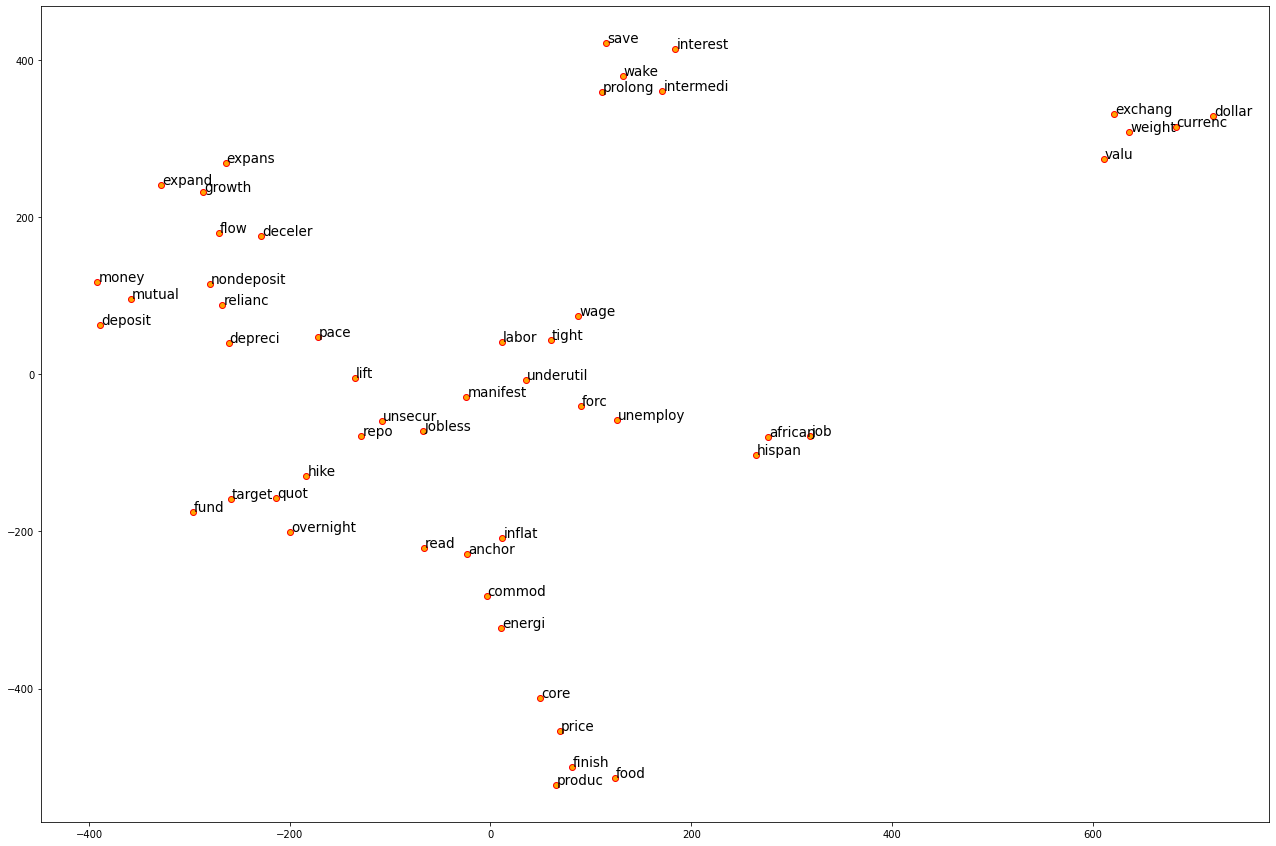

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words_2.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(22, 15))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', fontsize=13.5)

## 2-4 **Down**

### 2-4-1 *Word2Vec*

In [ ]:
from gensim.models import word2vec
import nltk

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in FOMC_pickle_down]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 2  # Minimum word count
# min_word_count = 10 for all corpus    
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

In [ ]:
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=20)] # topn=5
                  for search_term in ['inflat', 'price', 'growth', 'unemploy', 'labor', 'interest', 'money', 'fund', 'exchang']}
similar_words

{'exchang': ['dollar',
  'depreci',
  'g',
  'currenc',
  'foreign',
  'valu',
  'peso',
  'major',
  'eb',
  'weight',
  'concert',
  'mexican',
  'disappoint',
  'equiti',
  'diminut',
  'brazil',
  'exposur',
  'risen',
  'sovereign',
  'franc'],
 'fund': ['target',
  'effr',
  'unsecur',
  'overnight',
  'libor',
  'certif',
  'ioer',
  'oi',
  'cp',
  'announc',
  'intraday',
  'interbank',
  'approv',
  'london',
  'governor',
  'accompani',
  'swap',
  'paper',
  'plu',
  'surpris'],
 'growth': ['expans',
  'pace',
  'expand',
  'gain',
  'restraint',
  'grew',
  'latin',
  'digit',
  'demonstr',
  'midpoint',
  'gradual',
  'economi',
  'recoveri',
  'america',
  'analysi',
  'boost',
  'slacken',
  'canada',
  'diminut',
  'grown'],
 'inflat': ['disinflationari',
  'quiescent',
  'calcul',
  'slack',
  'commod',
  'read',
  'anchor',
  'resourc',
  'drift',
  'core',
  'energi',
  'firmli',
  'pressur',
  'headlin',
  'expect',
  'transitori',
  'food',
  'underlin',
  'pce',


In [ ]:
similar_words_2 = {
 'exchang': ['dollar', 'g', 'depreci', 'currenc', 'valu'],
 'fund': ['target', 'effr', 'overnight', 'certif', 'ioer'],
 'growth': ['expans', 'pace', 'expand', 'midpoint', 'gain'],
 'inflat': ['disinflationari', 'calcul', 'anchor', 'firmli'],
 'interest': ['counter', 'refinanc', 'attract', 'intermedi', 'pent'],
 'labor': ['fill', 'wage', 'payrol', 'qualifi', 'evidenc'],
 'money': ['inflow', 'deposit', 'safeti', 'mutual', 'flight'],
 'price': ['food', 'headlin', 'stage', 'commod', 'pass'],
 'unemploy': ['popul', 'african', 'forc', 'workweek', 'civilian']}

In [ ]:
'unemploy': ['popul', 'african', 'civilian', 'workweek', 'forc', 'age', 'claim', 'group', 'hour', 'hispan', 'hurrican', 'job', 'white', 'steadi', 'insur']}

In [ ]:
 'unemploy': ['popul', 'african', 'age', 'civilian', 'workweek', 'forc', 'claim', 'hour', 'group', 'steadi', 'hispan', 'white', 'american', 'job', 'averag', 'insur', 'hurrican', 'payrol', 'employ', 'roughli']}

### 2-4-2 *Visualizing word embeddings*

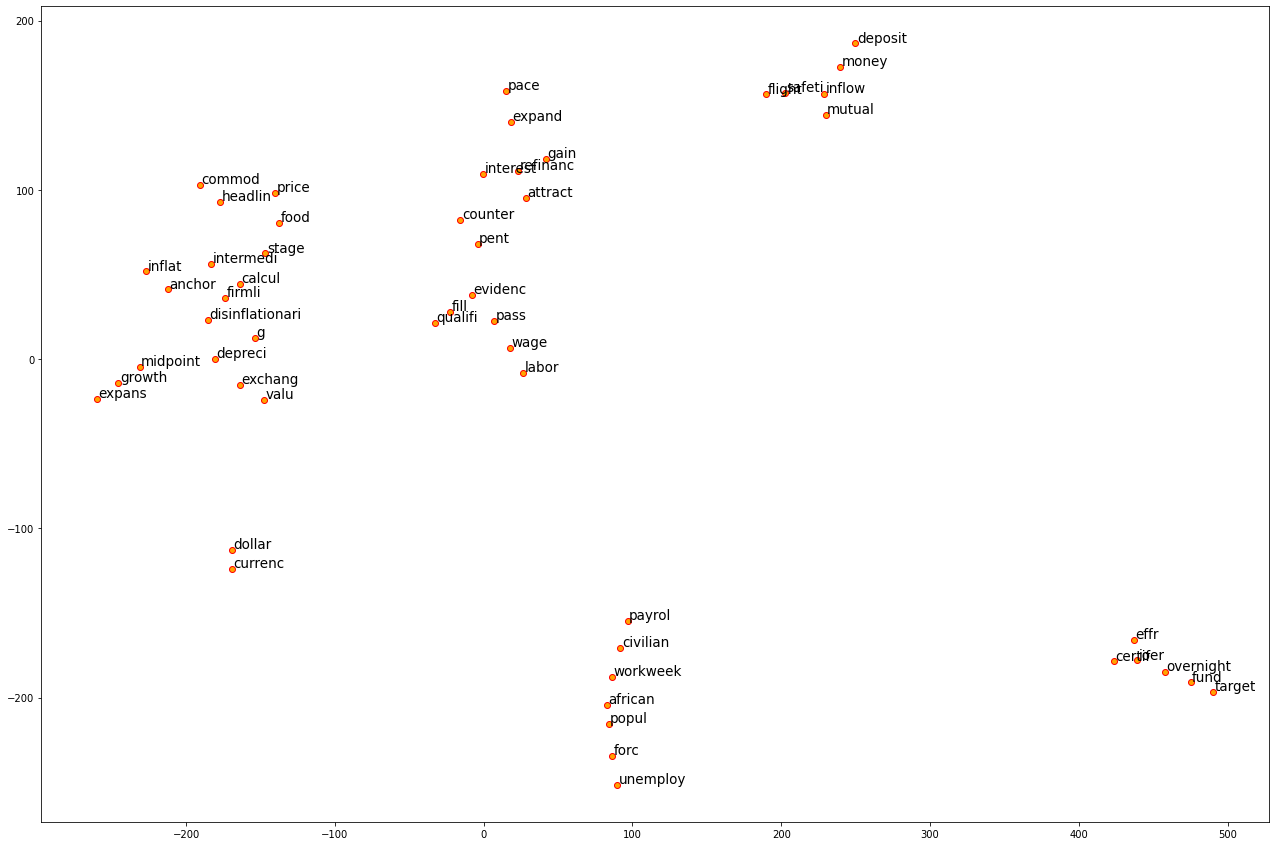

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words_2.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(22, 15))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', fontsize=13.5)

## 2-5 **Unchanged**

### 3-4-1 Word2Vec

In [ ]:
from gensim.models import word2vec
import nltk

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in FOMC_pickle_unchanged]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 5  # Minimum word count
# min_word_count = 10 for all corpus    
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

In [ ]:
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=20)] # topn=5
                  for search_term in ['inflat', 'price', 'growth', 'unemploy', 'labor', 'interest', 'money', 'fund', 'exchang']}
similar_words

{'exchang': ['depreci',
  'equiti',
  'intermedi',
  'chair',
  'british',
  'cap',
  'substitut',
  'bund',
  'appreci',
  'benchmark',
  'g',
  'embed',
  'neg',
  'day',
  'garner',
  'sovereign',
  'allow',
  'currenc',
  'machineri',
  'larger'],
 'fund': ['reserv',
  'assign',
  'quot',
  'aa',
  'ioer',
  'overnight',
  'rrp',
  'oi',
  'exercis',
  'repurchas',
  'minim',
  'impend',
  'accompani',
  'paper',
  'decis',
  'interest',
  'swap',
  'primari',
  'eurodollar',
  'repo'],
 'growth': ['expans',
  'gain',
  'expand',
  'recoveri',
  'pace',
  'crise',
  'accumul',
  'activ',
  'drawdown',
  'uptrend',
  'bounceback',
  'perform',
  'undoubtedli',
  'grow',
  'buildup',
  'deep',
  'grown',
  'demand',
  'slowdown',
  'rebuild'],
 'inflat': ['commod',
  'disinflationari',
  'core',
  'anchor',
  'disinfl',
  'transitori',
  'price',
  'gasolin',
  'wage',
  'pass',
  'seri',
  'expect',
  'dissip',
  'resourc',
  'slack',
  'energi',
  'stabl',
  'predomin',
  'would',


In [ ]:
similar_words_2 = {
 'exchang': ['depreci', 'equiti', 'intermedi', 'power', 'chair'],
 'fund': ['assign', 'reserv', 'quot', 'oi', 'aa'],
 'growth': ['expans', 'recoveri', 'gain', 'expand', 'activ'],
 'inflat': ['commod', 'disinflationari', 'core', 'dissip', 'anchor'],
 'interest': ['jumbo', 'yield', 'intermedi', 'oi', 'save'],
 'labor': ['wage', 'reconcil', 'fill', 'suffici', 'worker'],
 'money': ['inflow', 'deposit', 'mutual', 'depositori', 'nonwithheld'],
 'price': ['food', 'headlin', 'non', 'item', 'pass'],
 'unemploy': ['forc', 'popul', 'age', 'hire', 'workweek']}

In [ ]:
'unemploy': ['forc', 'age', 'popul', 'hire', 'workweek', 'jobless', 'weekli', 'fill', 'unus', 'addendum', 'underutil', 'job', 'payrol', 'manifest', 'share']}

In [ ]:
 'unemploy': ['forc', 'popul', 'age', 'workweek', 'hire', 'jobless', 'delinqu', 'work', 'addendum', 'save', 'lengthi', 'weekli', 'worker', 'job', 'reason', 'suspend', 'manifest', 'interest', 'payrol', 'durat']}

### 3-4-2 Visualizing word embeddings

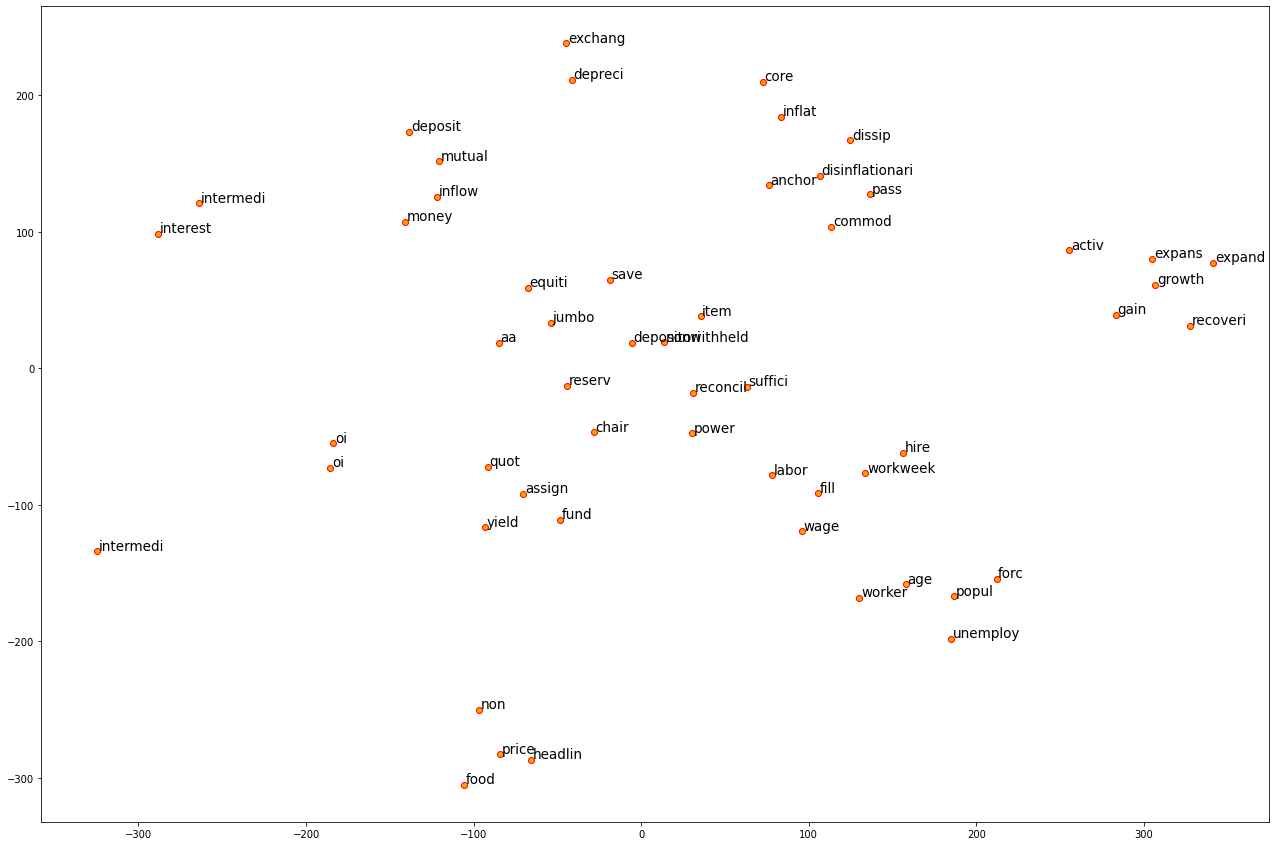

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words_2.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(22, 15))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', fontsize=13.5)

# (3) Classification

## Preparation

In [42]:
# Run (1) & 2-2 before running this section

print(up_index); print(down_index); print(unchanged_index)

[8, 9, 10, 12, 14, 16, 33, 51, 52, 54, 56, 57, 58, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 183, 191, 193, 195, 199, 201, 203, 205, 207]
[19, 23, 24, 45, 46, 63, 64, 65, 66, 67, 68, 69, 70, 71, 78, 83, 117, 118, 119, 120, 121, 122, 125, 126, 127, 212, 213, 214, 216, 217]
[0, 1, 2, 3, 4, 5, 6, 7, 11, 13, 15, 17, 18, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 53, 55, 59, 60, 61, 62, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 108, 109, 110, 111, 112, 113, 114, 115, 116, 123, 124, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 192, 194, 196, 197, 198, 200, 202, 204, 206, 208, 209, 210, 211, 215, 218, 219, 220, 22

In [43]:
print(np.array(fund_rate_change[24:246])[up_index])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [44]:
print(np.array(fund_rate_change[24:246])[down_index])

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


In [45]:
print(np.array(fund_rate_change[24:246])[unchanged_index])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [46]:
fund_rate_change[0:5]

[0, 0, 0, -1, 0]

In [47]:
fund_rate_change[1:5]

[0, 0, -1, 0]

In [48]:
fund_rate_change[245]

0

In [49]:
print(len(fund_rate_change))
fund_rate_change_2 = fund_rate_change[24:246]
print(len(fund_rate_change))

246
246


In [50]:
# 4.5-times filter (5 vocs)

A = ['hurrican']
B = ['eas']

C = ['turmoil', 'correct']
D = []

E = ['eas', 'weaken']
F = []

voc_4_5_filter = set(A+B+C+D+E+F)
print(len(voc_4_5_filter))

5


## Confusion matrix function

In [51]:
from sklearn import metrics
import pandas as pd

def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex.from_product([['Predicted'], classes]), 
                            index=pd.MultiIndex.from_product([['Actual'], classes])) 
    '''
    cm_frame = pd.DataFrame(data=cm, 
                        columns=pd.MultiIndex.from_product(levels=[['Predicted:'], classes], 
                                              labels=level_labels), 
                        index=pd.MultiIndex.from_product(levels=[['Actual:'], classes], 
                                            labels=level_labels)) 
    '''
    print(cm_frame) 

In [52]:
from sklearn import metrics
import pandas as pd

def display_confusion_matrix_pretty(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex.from_product([['Predicted'], classes]), 
                            index=pd.MultiIndex.from_product([['Actual'], classes])) 
    return cm_frame

## 80/20 split for 500 times using LR, SVM, RF, XGBoost

### LR

In [53]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

times = 100
lr_n_times = np.zeros(times)

t1 = t.perf_counter()

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  from sklearn.model_selection import train_test_split

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  from sklearn.feature_extraction.text import CountVectorizer
  from sklearn.model_selection import cross_val_score

  # build BOW features on train articles
  cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, vocabulary = voc_4_5_filter, ngram_range=(1, 1))
  cv_train_features = cv.fit_transform(train_corpus)

  # transform test articles into features
  cv_test_features = cv.transform(test_corpus)

  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)


  # [2] LR
 
  lr_pipeline = Pipeline([('lr', LogisticRegression(penalty='l2', max_iter=8000, random_state=42))])

  param_grid = {'lr__C': [0.01, 0.1, 1.0, 5.0, 10.0, 100.0]}

  gs_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, verbose=0)
  gs_lr = gs_lr.fit(cv_train_features, train_label_nums)

  best_lr_test_score = gs_lr.score(cv_test_features, test_label_nums)
  # print('Test Accuracy :', best_lr_test_score)

  lr_n_times[i] = np.around(best_lr_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(lr_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(lr_n_times) * 100))

Times [ 10/100] | test accuracy: 79.11 % | Time spent: 12.45 s
Times [ 20/100] | test accuracy: 80.56 % | Time spent: 24.54 s
Times [ 30/100] | test accuracy: 80.15 % | Time spent: 36.68 s
Times [ 40/100] | test accuracy: 79.67 % | Time spent: 49.11 s
Times [ 50/100] | test accuracy: 80.04 % | Time spent: 60.64 s
Times [ 60/100] | test accuracy: 80.63 % | Time spent: 72.4 s
Times [ 70/100] | test accuracy: 80.41 % | Time spent: 83.86 s
Times [ 80/100] | test accuracy: 80.33 % | Time spent: 96.15 s
Times [ 90/100] | test accuracy: 80.62 % | Time spent: 108.21 s
Times [100/100] | test accuracy: 80.71 % | Time spent: 119.78 s

Running time: 119.78 s

Final test accuracy: 80.71 %


In [54]:
gs_lr.best_estimator_.get_params()

{'lr': LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=8000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'lr__C': 0.1,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 8000,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': 42,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'memory': None,
 'steps': [('lr',
   LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=8000,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=42, solver='lbfgs', t

### SVM

In [55]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

times = 100
svm_n_times = np.zeros(times)

t1 = t.perf_counter()

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  from sklearn.model_selection import train_test_split

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  from sklearn.feature_extraction.text import CountVectorizer
  from sklearn.model_selection import cross_val_score

  # build BOW features on train articles
  cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, vocabulary = voc_4_5_filter, ngram_range=(1, 1))
  cv_train_features = cv.fit_transform(train_corpus)

  # transform test articles into features
  cv_test_features = cv.transform(test_corpus)

  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)


  # [2] SVM
 
  svm_pipeline = Pipeline([('svm', SVC(kernel='rbf'))])

  param_grid = {'svm__gamma': [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 0, 1],
                'svm__C': [0.1, 1.0, 10, 100, 500, 1000]}

  gs_svm = GridSearchCV(svm_pipeline, param_grid, cv=5, verbose=0)
  gs_svm = gs_svm.fit(cv_train_features, train_label_nums)

  best_svm_test_score = gs_svm.score(cv_test_features, test_label_nums)

  svm_n_times[i] = np.around(best_svm_test_score, 4)

  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(svm_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(svm_n_times) * 100))

Times [ 10/100] | test accuracy: 78.67 % | Time spent: 12.19 s
Times [ 20/100] | test accuracy: 78.67 % | Time spent: 24.29 s
Times [ 30/100] | test accuracy: 79.19 % | Time spent: 36.49 s
Times [ 40/100] | test accuracy: 80.06 % | Time spent: 48.64 s
Times [ 50/100] | test accuracy: 79.87 % | Time spent: 60.69 s
Times [ 60/100] | test accuracy: 79.81 % | Time spent: 72.82 s
Times [ 70/100] | test accuracy: 79.62 % | Time spent: 84.88 s
Times [ 80/100] | test accuracy: 79.86 % | Time spent: 97.01 s
Times [ 90/100] | test accuracy: 79.80 % | Time spent: 109.13 s
Times [100/100] | test accuracy: 79.73 % | Time spent: 121.23 s

Running time: 121.23 s

Final test accuracy: 79.73 %


In [56]:
gs_svm.best_estimator_.get_params()

{'memory': None,
 'steps': [('svm',
   SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
       max_iter=-1, probability=False, random_state=None, shrinking=True,
       tol=0.001, verbose=False))],
 'svm': SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'svm__C': 1000,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight': None,
 'svm__coef0': 0.0,
 'svm__decision_function_shape': 'ovr',
 'svm__degree': 3,
 'svm__gamma': 0.001,
 'svm__kernel': 'rbf',
 'svm__max_iter': -1,
 'svm__probability': False,
 'svm__random_state': None,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False,
 'verbose': False}

### RF

In [57]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

times = 100
rfc_n_times = np.zeros(times)

t1 = t.perf_counter()

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  from sklearn.model_selection import train_test_split

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  from sklearn.feature_extraction.text import CountVectorizer
  from sklearn.model_selection import cross_val_score

  # build BOW features on train articles
  cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, vocabulary = voc_4_5_filter, ngram_range=(1, 1))
  cv_train_features = cv.fit_transform(train_corpus)

  # transform test articles into features
  cv_test_features = cv.transform(test_corpus)



  # [3] RF
 
  rfc_pipeline = Pipeline([('rfc', RandomForestClassifier(random_state=2020, criterion = "gini"))])

  param_grid = {'rfc__n_estimators': [100, 300, 500, 700]}

  gs_rfc = GridSearchCV(rfc_pipeline, param_grid, cv=5, verbose=0)
  gs_rfc = gs_rfc.fit(cv_train_features, train_label_nums)

  best_rfc_test_score = gs_rfc.score(cv_test_features, test_label_nums)

  rfc_n_times[i] = np.around(best_rfc_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(rfc_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(rfc_n_times) * 100))

Times [ 10/100] | test accuracy: 82.44 % | Time spent: 128.51 s
Times [ 20/100] | test accuracy: 80.11 % | Time spent: 256.74 s
Times [ 30/100] | test accuracy: 79.33 % | Time spent: 386.53 s
Times [ 40/100] | test accuracy: 78.72 % | Time spent: 515.79 s
Times [ 50/100] | test accuracy: 78.40 % | Time spent: 643.75 s
Times [ 60/100] | test accuracy: 78.04 % | Time spent: 772.82 s
Times [ 70/100] | test accuracy: 77.75 % | Time spent: 900.66 s
Times [ 80/100] | test accuracy: 77.97 % | Time spent: 1030.38 s
Times [ 90/100] | test accuracy: 77.98 % | Time spent: 1161.13 s
Times [100/100] | test accuracy: 78.00 % | Time spent: 1290.12 s

Running time: 1290.12 s

Final test accuracy: 78.00 %


In [58]:
gs_rfc.best_estimator_.get_params()

{'memory': None,
 'rfc': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=500,
                        n_jobs=None, oob_score=False, random_state=2020,
                        verbose=0, warm_start=False),
 'rfc__bootstrap': True,
 'rfc__ccp_alpha': 0.0,
 'rfc__class_weight': None,
 'rfc__criterion': 'gini',
 'rfc__max_depth': None,
 'rfc__max_features': 'auto',
 'rfc__max_leaf_nodes': None,
 'rfc__max_samples': None,
 'rfc__min_impurity_decrease': 0.0,
 'rfc__min_impurity_split': None,
 'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 2,
 'rfc__min_weight_fraction_leaf': 0.0,
 'rfc__n_estimators': 500,
 'rfc__n_

### XGBoost

In [59]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

times = 100
xgb_n_times = np.zeros(times)

t1 = t.perf_counter()

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  from sklearn.model_selection import train_test_split

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  from sklearn.feature_extraction.text import CountVectorizer
  from sklearn.model_selection import cross_val_score

  # build BOW features on train articles
  cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, vocabulary = voc_4_5_filter, ngram_range=(1, 1))
  cv_train_features = cv.fit_transform(train_corpus)

  # transform test articles into features
  cv_test_features = cv.transform(test_corpus)



  # [4] XGBoost
 
  xgb_pipeline = Pipeline([('xgb', XGBClassifier(booster='gbtree', min_child_weight=1, verbosity=1, random_state=42))])

  param_grid = {'xgb__n_estimators': [100, 200, 400],
                'xgb__gamma': [0],
                'xgb__min_child_weight': [1],
                'xgb__subsample': [0.5, 1.0],
                'xgb__colsample_bytree': [0.5, 1.0],
                'xgb__max_depth': [6],
                'xgb__learning_rate': [0.3],
                'xgb__colsample_bytree': [0.5, 1.0],
                }

  gs_xgb = GridSearchCV(xgb_pipeline, param_grid, cv=5, verbose=0)
  gs_xgb = gs_xgb.fit(cv_train_features, train_label_nums)

  best_xgb_test_score = gs_xgb.score(cv_test_features, test_label_nums)

  xgb_n_times[i] = np.around(best_xgb_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(xgb_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = np.around(t2 - t1, 2)
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {} s'.format(i+1, times, test_accuracy, time_spent))

t3 = t.perf_counter()
time_spent_final = np.around(t3 - t1, 2)
print()
print("Running time: {} s".format(time_spent_final))
print()
print("Final test accuracy: {:5.2f} %".format(np.mean(xgb_n_times) * 100))

Times [ 10/100] | test accuracy: 80.00 % | Time spent: 40.0 s
Times [ 20/100] | test accuracy: 79.56 % | Time spent: 79.8 s
Times [ 30/100] | test accuracy: 78.22 % | Time spent: 119.49 s
Times [ 40/100] | test accuracy: 78.72 % | Time spent: 159.29 s
Times [ 50/100] | test accuracy: 79.38 % | Time spent: 199.54 s
Times [ 60/100] | test accuracy: 79.52 % | Time spent: 239.19 s
Times [ 70/100] | test accuracy: 79.68 % | Time spent: 279.21 s
Times [ 80/100] | test accuracy: 79.53 % | Time spent: 318.88 s
Times [ 90/100] | test accuracy: 79.51 % | Time spent: 358.84 s
Times [100/100] | test accuracy: 79.47 % | Time spent: 398.52 s

Running time: 398.52 s

Final test accuracy: 79.47 %


In [60]:
gs_xgb.best_estimator_.get_params()

{'memory': None,
 'steps': [('xgb',
   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=0.5, gamma=0,
                 learning_rate=0.3, max_delta_step=0, max_depth=6,
                 min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
                 nthread=None, objective='multi:softprob', random_state=42,
                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                 silent=None, subsample=1.0, verbosity=1))],
 'verbose': False,
 'xgb': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.3, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
               nthread=None, objective='multi:softprob', random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               